# Exploring MIRI data: PAHs and dust in the ISM of nearby galaxies

## Setup

1) Import all packages for general usage in this notebook (specific libraries will be considered separately)
2) Define path to __YOUR__ directory where all the data for this tutorial (originals and processed) will be stored
3) Copy all files from the _read-only_ source directory to the folder that you just defined (this will create new directory, if it does not exist)

In [1]:
# Import all packages for general usage
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.table import Table
import numpy as np
import os
from matplotlib import pyplot as plt
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch, LinearStretch
import glob
from tqdm.notebook import tqdm
import seaborn as sns
import re

In [2]:
# work directory
work_dir = "/Users/mors/Science/PyWorkspace/JWST_school/data/"

# === Don't change these lines. They define the folder structure that is used in this tutorial.
# Also, try to use these defined variables in the excercises
psf_dir = os.path.join(work_dir, 'PSF')  # folder with PSFs
kernels_dir = os.path.join(work_dir, 'PSF', 'kernels') # subfolder with convolution kernels
jwst_data_dir = os.path.join(work_dir, 'PHANGS-JWST') # folder with JWST images
jwst_bgrcorr_data_dir = os.path.join(jwst_data_dir, 'bgrcorr') # folder with JWST images after background matching
convolved_data_dir = os.path.join(jwst_data_dir, 'convolved') # folder with convolved JWST images to match resolution of other data
convolved_bgrcorr_data_dir = os.path.join(jwst_data_dir, 'convolved_bgrcorr') # folder with convolved and background-mactched JWST images (use this for science analysis)
muse_data_dir = os.path.join(work_dir, 'PHANGS-MUSE') # folder with MUSE Halpha images
spitzer_data_dir = os.path.join(work_dir, 'Spitzer') # folder with Spitzer images

In [3]:
# copy/link files to your work directory
if not os.path.isdir(work_dir):
    print("Something wrong with the path to your work_dir. Check it")
else:
    print("Start copying/linking files")
    os.chdir(work_dir)
    for d in ["PHANGS-JWST/convolved", "PHANGS-JWST/bgrcorr", "PHANGS-JWST/astrometry_align_demo", "PHANGS-JWST/convolved_bgrcorr", 
                "PHANGS-MUSE", "Spitzer", "PSF/gauss", "PSF/jwst", "PSF/kernels", "PSF/spitzer"]:
        if not os.path.isdir(d):
            os.makedirs(d)
    source_dir = "/media/home/team_workspaces/JWST-Heidelberg-Summer-School/Lecturers_Area/Tuesday_Session_3/data/"
    files = glob.glob(source_dir+"PHANGS-JWST/*.fits")
    for f in files:
        f_target = f"PHANGS-JWST/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, )
    files = glob.glob(source_dir+"PHANGS-JWST/bgrcorr/*.fits")
    for f in files:
        f_target=f"PHANGS-JWST/bgrcorr/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, f_target)
    files = glob.glob(source_dir+"PHANGS-JWST/astrometry_align_demo/*.fits")
    for f in files:
        f_target=f"PHANGS-JWST/astrometry_align_demo/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, f_target)
    files = glob.glob(source_dir+"PHANGS-MUSE/*.fits")
    for f in files:
        f_target=f"PHANGS-MUSE/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, f_target)
    files = glob.glob(source_dir+"Spitzer/*.fits")
    for f in files:
        f_target=f"Spitzer/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, f_target)
            
    files = glob.glob(source_dir+"PHANGS-JWST/convolved_bgrcorr/*.fits")
    for f in files:
        f_target=f"PHANGS-JWST/convolved_bgrcorr/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            shutil.copy(f, f_target)
    
    files = glob.glob(source_dir+"PHANGS-JWST/convolved/*.fits")
    for f in files:
        f_target=f"PHANGS-JWST/convolved/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            shutil.copy(f, f_target)
    
    files = glob.glob(source_dir+"PSF/gauss/*.fits")
    for f in files:
        f_target=f"PSF/gauss/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            shutil.copy(f, f_target)
    
    files = glob.glob(source_dir+"PSF/jwst/*.fits")
    for f in files:
        f_target=f"PSF/jwst/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            shutil.copy(f, f_target)
    
    files = glob.glob(source_dir+"PSF/kernels/*.fits")
    for f in files:
        f_target=f"PSF/kernels/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            shutil.copy(f, f_target)
    
    files = glob.glob(source_dir+"PSF/spitzer/*.fits")
    for f in files:
        f_target=f"PSF/spitzer/{f.split('/')[-1]}"
        if not os.path.exists(f_target):
            os.symlink(f, f_target)
    
print("Done!")

## Part 1. Quick look at the data

Let's look at the JWST/MIRI F770W and F2100W intensities and try to plot $R_{PAH} = F770W/F2100W$. The latter ratio is a good tracer of PAH molecules mass fraction in the dust component of ISM.
(note that $R_{PAH} = F770W+F1130W/F2100W$ is often prefered, but here we neglect F1130W for simplicity)

/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/2374296103.py:12: RuntimeWarning: divide by zero encountered in divide
  rpah = f770w/f2100w
/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/2374296103.py:12: RuntimeWarning: invalid value encountered in divide
  rpah = f770w/f2100w


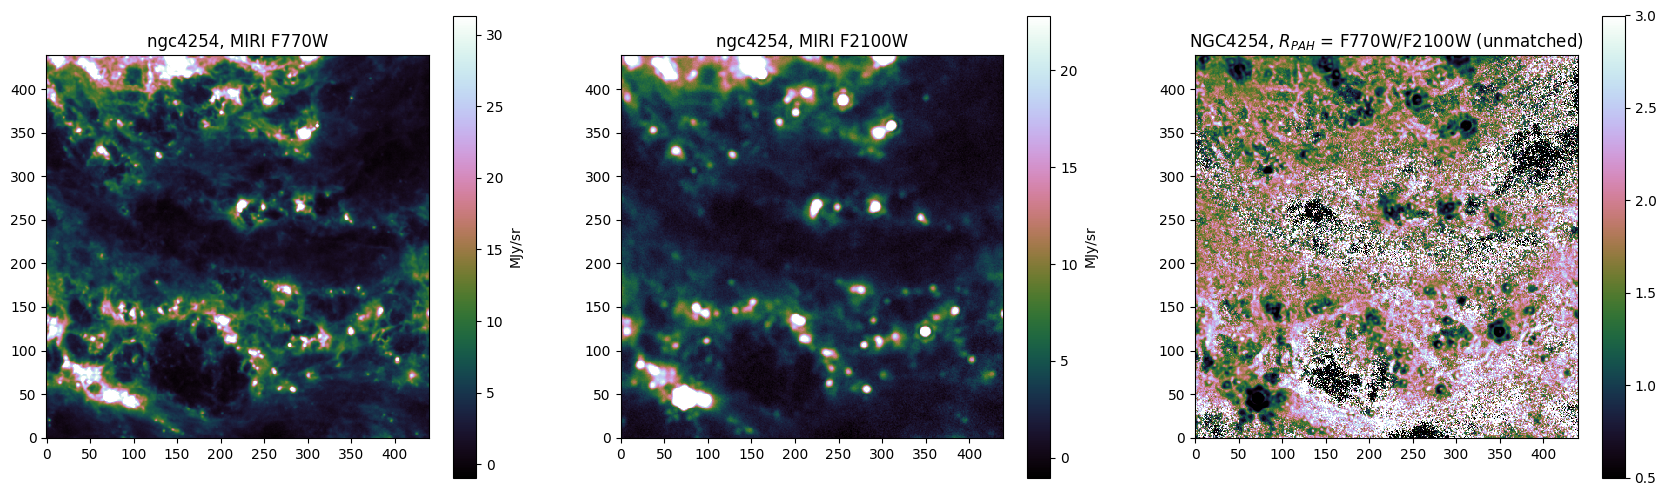

In [4]:
# Select the name of the galaxy that you'd like to see
# options: ngc628, ngc1566, ngc4254, ic5332
galaxy = 'ngc4254'

# Go to the folder with JWST data
os.chdir(jwst_data_dir)

# Read F770W and F2100W images (from 'SCI' extension = 1) and calculate R_PAH = F770W/F2100W
f770w = fits.getdata(f"{galaxy}_f770w.fits", 1)
f2100w = fits.getdata(f"{galaxy}_f2100w.fits", 1)

rpah = f770w/f2100w

# phantom void
# xslice = slice(250,700)
# yslice = slice(550,1000)


# Select only part of the images to show (in pixels)
xslice = slice(1100,1540)
yslice = slice(660,1100)


# Show images
fig = plt.figure(figsize=(21,6))
fig.add_subplot(131)
norm = ImageNormalize(f770w, stretch=LinearStretch(), interval=PercentileInterval(98.)) 
plt.imshow(f770w[yslice, xslice], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F770W")
plt.colorbar(label='MJy/sr')

fig.add_subplot(132)
norm = ImageNormalize(f2100w, stretch=LinearStretch(), interval=PercentileInterval(98.))
plt.imshow(f2100w[yslice, xslice], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F2100W")
plt.colorbar(label='MJy/sr')

fig.add_subplot(133)
plt.imshow(rpah[yslice, xslice], origin='lower', interpolation='nearest', vmin=0.5, vmax=3, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy.upper()}, $R_{{PAH}}$ = F770W/F2100W (unmatched)")
plt.colorbar()



One can erroneously interpret the thin filamentary structures of high $R_{PAH}$ as a signature of elevated PAH mass fraction there. This is wrong because we haven't performed yet one important step - PSF matching.
Resolution of these images in F770W and F2100W differs significantly (XXX for F770W and 0.67 for F2100W), therefore F2100W appears as smoother image (outside prominent clumps), and the regions of high $R_{PAH}$ just trace better resolved structure of ISM visible in F770W.

__PSF (beam) matching is critical for proper comparison of any data sets obtained with different instruments/in different bands__

## Part 2. PSF matching

In order to match two images with different resolution/PSF, we need to measure the PSF itself for each of these images. After that, we can compute kernel that can be used for convolution of "image1" to match "image2". 
How to construct kernels is described in detail in <a href="https://ui.adsabs.harvard.edu/abs/2011PASP..123.1218A">Aniano et al. (2011)</a>. They also produced numerous kernels for convolution between various instruments, and IDL code to implement all their recepies. In python, you can use e.g. <a href="https://photutils.readthedocs.io/en/stable/">photutils</a> or <a href="https://github.com/aboucaud/pypher">pypher</a> (described in <a href="https://ui.adsabs.harvard.edu/abs/2016A%26A...596A..63B">Boucaud et al. (2016)</a>). Here we will use pypher with additional bespoke pre- and post-processing.

### Build JWST PSFs

<a href='https://webbpsf.readthedocs.io/en/latest/intro.html'>WebbPSF</a> tool (<a href="https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..3XP">Perrin et al. 2014</a>) can simulate PSF of any JWST instrument. In particular, in the latest version for today (1.2.1), it is possible to create PSF that will match the metadata in the observations (e.g. instrument, fiter, date etc.)

Let's generate oversampled PSFs for F770W and F2100W filters for any two galaxies in our sample and compare them.
We will need oversampled PSFs later for generate kernels with a better precision 

In [62]:
os.environ['WEBBPSF_PATH'] = '/usr/local/SciSoft/JWST/webbpsf-data/'
import webbpsf

# instrument = webbpsf.MIRI()
# instrument.filter = 'F770W'

galaxies = ['ngc628', 'ngc1566']

psf_f770w = []
psf_f2100w = []

for gal in galaxies:
    miri_f770 = webbpsf.setup_sim_to_match_file(os.path.join(jwst_data_dir, f'{gal}_f770w.fits'))
    miri_f2100 = webbpsf.setup_sim_to_match_file(os.path.join(jwst_data_dir, f'{gal}_f2100w.fits'))
    sim_psf = miri_f770.calc_psf(oversample=4, fov_arcsec=20)
    psf_f770w.append(sim_psf)

    sim_psf = miri_f2100.calc_psf(oversample=4, fov_arcsec=20)
    psf_f2100w.append(sim_psf)


**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


Setting up sim to match /Users/mors/Science/PyWorkspace/JWST_school/data/PHANGS-JWST/ngc628_f770w.fits
iterating query, tdelta=3.0

MAST OPD query around UTC: 2022-07-17T11:08:48.206
                        MJD: 59777.4644468287

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2022071702-NRCA3_FP1-1.fits
	Date (MJD):	 59777.4424
	Delta time:	 -0.0220 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2022071902-NRCA3_FP1-1.fits
	Date (MJD):	 59779.6513
	Delta time:	 2.1869 days
User requested choosing OPD time closest in time to 2022-07-17T11:08:48.206, which is R2022071702-NRCA3_FP1-1.fits, delta time -0.022 days
Importing and format-converting OPD from /usr/local/SciSoft/JWST/webbpsf-data/MAST_JWST_WSS_OPDs/R2022071702-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point

Configured simulation instrument for:
    Instrument: MIRI
    Filter: F770W
    Detector: MIRIM
    Apername: MIRIM_FULL
    

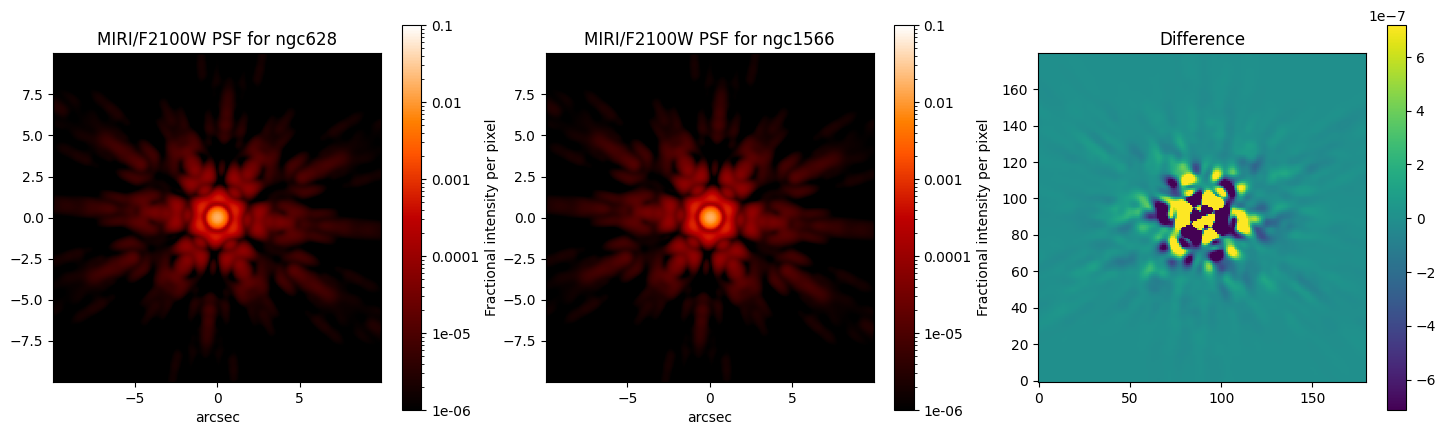

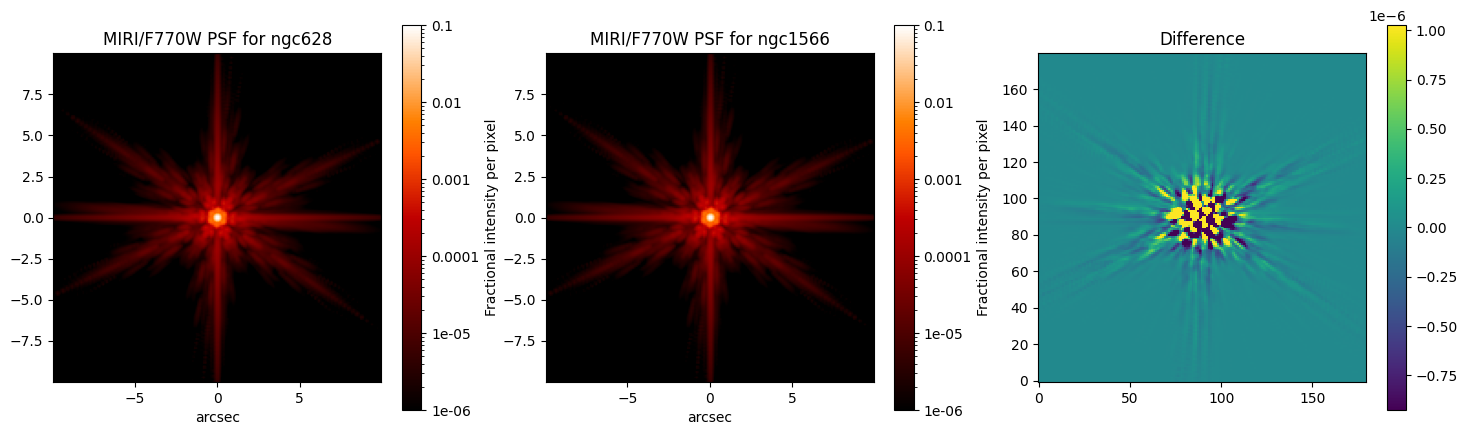

In [63]:
# Plot PSFs for F2100W
fig, ax = plt.subplots(1,3,figsize=(18,5))
for ind in range(2):
    plt.sca(ax[ind])
    webbpsf.display_psf(psf_f2100w[ind], ext='DET_DIST', vmax=0.1, vmin=1e-6, title=f'MIRI/F2100W PSF for {galaxies[ind]}')
plt.sca(ax[-1])
difference = psf_f2100w[1]['DET_DIST'].data-psf_f2100w[0]['DET_DIST'].data
norm = ImageNormalize(difference, interval=PercentileInterval(97))
plt.imshow(difference, norm=norm, origin='lower', interpolation='nearest')
plt.title('Difference')
plt.colorbar()

# Plot PSFs for F770W
fig, ax = plt.subplots(1,3,figsize=(18,5))
for ind in range(2):
    plt.sca(ax[ind])
    webbpsf.display_psf(psf_f770w[ind], ext='DET_DIST', vmax=0.1, vmin=1e-6, title=f'MIRI/F770W PSF for {galaxies[ind]}')
plt.sca(ax[-1])
difference = psf_f770w[1]['DET_DIST'].data-psf_f770w[0]['DET_DIST'].data
norm = ImageNormalize(difference, interval=PercentileInterval(98))
plt.imshow(difference, norm=norm, origin='lower', interpolation='nearest')
plt.title('Difference')
plt.colorbar()


As follows from the comparison, there are slight differences between PSFs for objects observed in defferent days. However, the absolute level of these differences is very low. Therefore, for simplicity, we will use further same PSFs for all galaxies. However, for the proper analysis, it might be better to consider PSFs best matching your data

In [64]:
# we save 'overdist' extension corresponding to 'oversampled PSF with detectro distorsions
fits.writeto(os.path.join(psf_dir, 'jwst', 'psf_miri_f2100w.fits'), data=psf_f2100w[0]['OVERDIST'].data, header=psf_f2100w[0]['OVERDIST'].header, overwrite=True)
fits.writeto(os.path.join(psf_dir, 'jwst', 'psf_miri_f770w.fits'), data=psf_f770w[0]['OVERDIST'].data, header=psf_f770w[0]['OVERDIST'].header, overwrite=True)

### Circularize PSFs

JWST PSFs (as well as of many other instruments) do not have azimuthal symmetry. In observations of the extended sources, its PSF angle can be not uniform across the FOV, and especially when several pointings obtained at different times are mosaicked together during the data reduction. Therefore, it is useful to consider azymuthaly symmetrical "circularized" PSFs for building convolution kernels.

Here we create and apply function that circularizes PSF.
To do this, we will construct new PSF summing the 2^14 times rotated PSF with 360/2^14 degree step. This can be preformed in just 14 iterations following the recepie from <a href="https://ui.adsabs.harvard.edu/abs/2011PASP..123.1218A">Aniano et al. (2011)</a>

In [75]:
from scipy.ndimage import rotate
def circularize(original_psf, n_rotations=14):
    data = original_psf.copy()
    for n in range(n_rotations, 0, -1):
        psf_rotate = rotate(data, 360 / (2 ** n), order=3, reshape=False)
        data = 0.5 * (data + psf_rotate)

    radius = np.min(data.shape) / 2
    x_cen = (data.shape[0] - 1) / 2
    y_cen = (data.shape[1] - 1) / 2

    xx, yy = np.meshgrid((np.arange(data.shape[1]) - x_cen),
                         (np.arange(data.shape[0]) - y_cen), indexing='xy')

    data[(xx ** 2 + yy ** 2) > radius ** 2] = 0

    # Round anything within machine uncertainty to 0
    data[np.abs(data) < np.finfo(float).eps] = 0
    data = data/np.nansum(data)
    return data


Apply circularization to the original JWST PSFs

In [66]:
psf_files = glob.glob(os.path.join(psf_dir,'jwst','*w.fits'))
for file in tqdm(psf_files):
    file_out = file.split('.fits')[0]+'_circ.fits'
    with fits.open(file) as hdu:
        psf_circularized = circularize(hdu[0].data)
        hdu[0].data = psf_circularized
        hdu.writeto(file_out, overwrite=True)


  0%|          | 0/3 [00:00<?, ?it/s]

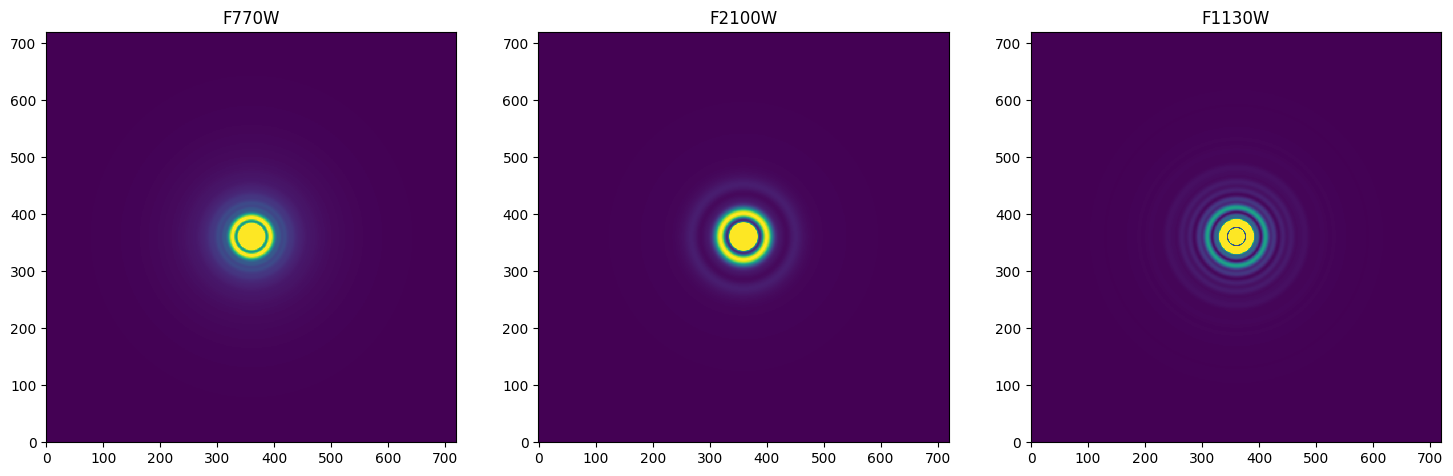

In [67]:
# find all PSFs in the directory, exclude circularized (_circ)
psf_files_circ= glob.glob(os.path.join(psf_dir,'jwst','*circ.fits'))
fig = plt.figure(figsize=(18,6))
for ind, f in enumerate(psf_files_circ):
    filter = re.search('(f\d+w)',f).group().upper()
    ax = fig.add_subplot(100+len(psf_files_circ)*10+ind+1)
    with fits.open(f) as hdu:
        norm = ImageNormalize(hdu[0].data, interval=PercentileInterval(99.))
        plt.imshow(hdu[0].data, origin='lower', interpolation='nearest', norm=norm)
        plt.title(filter)


### Create kernels with pypher

Now, let's create circularized kernel for F770W -> F2100W convolution. We will use pypher for that. 
Note that it requires pixel scale to be defined in wcs of the PSF. However, webbpsf doesn't create it. Therefore, we need to run first "addpixscl" from pypher in order to manually add this info to the fits header of all PSFs

In [68]:
os.chdir(psf_dir)
# Delete the kernel if already exists. 
file_kernel = os.path.join(kernels_dir, 'F770W_to_F2100W_circ.fits')
if os.path.isfile(file_kernel):
    os.remove(file_kernel)

# modify PSF file: add pxscale to wcs
pxscale = fits.getheader('jwst/psf_miri_f770w_circ.fits')['PIXELSCL']
os.system(f"addpixscl jwst/psf_miri_f770w_circ.fits jwst/psf_miri_f2100w_circ.fits {pxscale}")

#pypher team recomends to use regularization parameter (-r) about 1/(S/N) for your source. 
os.system(f"pypher jwst/psf_miri_f770w_circ.fits jwst/psf_miri_f2100w_circ.fits {file_kernel} -r 1e-2") 


pypher: Output kernel saved to /Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/F770W_to_F2100W_circ.fits


0

Create function to postprocess our kernel:
 1) Trim kernel at a given total energy fraction threshold. By default, we are going to make kernels that redistribute 99.9% of the total flux and slightly reduce the sizes of the kernels. This can help to speed up the convolution and potentially minimize number of artifacts due to extended uncertain wings
 2) Resample kernel to the original detector pixel scale
 3) Adjust its shape, if necessary, to make sure it has odd number of pixels along each axis
 4) Normalize kernel -> integral must be 1.

In [76]:
from scipy.ndimage import zoom

def postprocess_kernel(file_kernel, fileout=None, energy_tol=0.999, detector_pxscale=0.1109):
    with fits.open(file_kernel) as hdu:
        kernel = hdu[0].data
        kernel_header = hdu[0].header
    kernel_radius = int((kernel.shape[0] - 1) / 2)

    xc = (kernel.shape[1] - 1) / 2
    yc = (kernel.shape[0] - 1) / 2
    xx, yy = np.meshgrid(np.arange(kernel.shape[1]), np.arange(kernel.shape[0]), indexing='xy')

    rr = np.sqrt((xx - xc) ** 2 + (yy - yc) ** 2)

    # Calculate radius where enclosed energy starts to exceed 99.9% (or other specified value) of total energy. Trim everything beyond this radius
    total_kernel_energy = np.nansum(np.abs(kernel[rr <= kernel_radius]))
    for radius in range(kernel_radius):
        enclosed_energy = np.nansum(np.abs(kernel[rr <= radius]))
        frac_kernel_energy = enclosed_energy / total_kernel_energy
        if frac_kernel_energy >= energy_tol:
            break
    kernel[rr > radius] = 0
    trim_offset = kernel_radius - radius
    kernel = kernel[trim_offset: -trim_offset, trim_offset: -trim_offset]
    print(f"Trim kernel: old size {kernel_radius*2+1}, new size {kernel_radius*2+1 - 2*trim_offset}")

    # Resample kernel onto the detector pixel scale
    pxscale_kernel = WCS(kernel_header).proj_plane_pixel_scales()[0].value*3600
    kernel_resample = zoom(kernel, pxscale_kernel/detector_pxscale, order=3)
    
    # force odd-sized array - the kernel needs to be odd
    if kernel_resample.shape[0] % 2 == 0:
        kernel_resample = kernel_resample[:-1, :]
    if kernel_resample.shape[1] % 2 == 0:
        kernel_resample = kernel_resample[:, :-1]
    
    # repeat circularization to make sure the numerical noise or other artefacts introduced by resampling etc. are minimized (following Aniano+2011 recipe)
    kernel_resample = circularize(kernel_resample)
    # normalize resampled kernel so the integral == 1
    kernel_resample = kernel_resample/np.nansum(kernel_resample)

    # save resulting final kernel
    fits.writeto(fileout, kernel_resample, overwrite=True)


Trim kernel: old size 719, new size 695


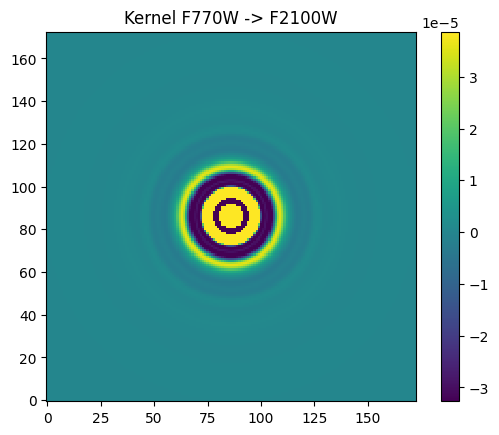

In [81]:
# finalize kernel
pxscale_im = 0.1109  # pxscale of JWST MIRI
postprocess_kernel('kernels/F770W_to_F2100W_circ.fits', fileout='kernels/F770W_to_F2100W_fin.fits', detector_pxscale=pxscale_im)

# Show the resulting kernel 
kernel = fits.getdata('kernels/F770W_to_F2100W_fin.fits')
norm = ImageNormalize(kernel, interval=PercentileInterval(97))
plt.imshow(kernel, origin='lower', interpolation='nearest', norm=norm)
plt.title('Kernel F770W -> F2100W')
plt.colorbar()

### Convolve F770W to match F2100W resolution

Final steps are:
- Convolve original F770W image using just created F770W->F2100W kernel
- Reproject new image to the same wcs grid as for F2100W. 
- Compare the images. Have the thin filaments gone from $R_{PAH}$ maps? 

In [15]:
from reproject import reproject_interp
from astropy.convolution import convolve_fft
galaxy = 'ngc4254'
filter = 'f770w'
# Read kernel
kernel = fits.getdata(os.path.join(kernels_dir, f'{filter.upper()}_to_F2100W_fin.fits'))

# Get wcs and shape of target file
with fits.open(os.path.join(jwst_data_dir, f'{galaxy}_f2100w.fits')) as hdu:
    target_wcs = WCS(hdu['SCI'].header)
    target_shape = hdu['SCI'].data.shape
        
with fits.open(os.path.join(jwst_data_dir, f'{galaxy}_{filter}.fits')) as hdu:
    # Do convolution; make sure that all zero values were set to NaNs to not affect the convolution results
    hdu['ERR'].data[hdu['SCI'].data == 0] = np.nan
    hdu['SCI'].data[hdu['SCI'].data == 0] = np.nan
    conv_im = convolve_fft(hdu['SCI'].data, kernel=kernel, preserve_nan=True, fill_value=np.nan)
    # Convolve errors (with kernel**2, do not normalize it). This, however, doesn't accound for covariance between pixels
    conv_err = np.sqrt(convolve_fft(hdu['ERR'].data**2, kernel**2, 
                                    preserve_nan=True, normalize_kernel=False))

    
    hdulist_out = fits.HDUList([fits.PrimaryHDU(header=hdu[0].header)])
    # Reprojection to F2100W wcs grid
    repr_data, fp = reproject_interp((conv_im, hdu['SCI'].header), output_projection=target_wcs, shape_out=target_shape) 
    fp = fp.astype(bool)
    repr_data[~fp] = np.nan
    header = hdu['SCI'].header
    header.update(target_wcs.to_header())
    hdulist_out.append(fits.ImageHDU(data=repr_data, header=header, name='SCI'))

    repr_err = reproject_interp((conv_err, hdu['SCI'].header), output_projection=target_wcs, shape_out=target_shape, return_footprint=False)
    repr_err[~fp] = np.nan
    header = hdu['ERR'].header
    hdulist_out.append(fits.ImageHDU(data=repr_err, header=header, name='ERR'))

    hdulist_out.writeto(os.path.join(convolved_data_dir, f'{galaxy}_{filter}_to_f2100w.fits'), overwrite=True)


Set DATE-AVG to '2023-06-18T05:05:52.617' from MJD-AVG.
Set DATE-END to '2023-06-18T06:00:38.126' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.640463 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725520403.108 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-06-18T04:33:02.743' from MJD-AVG.
Set DATE-END to '2023-06-18T05:26:07.856' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.636399 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725489607.098 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/2556785743.py:4: RuntimeWarning: divide by zero encountered in divide
  rpah = f770w/f2100w


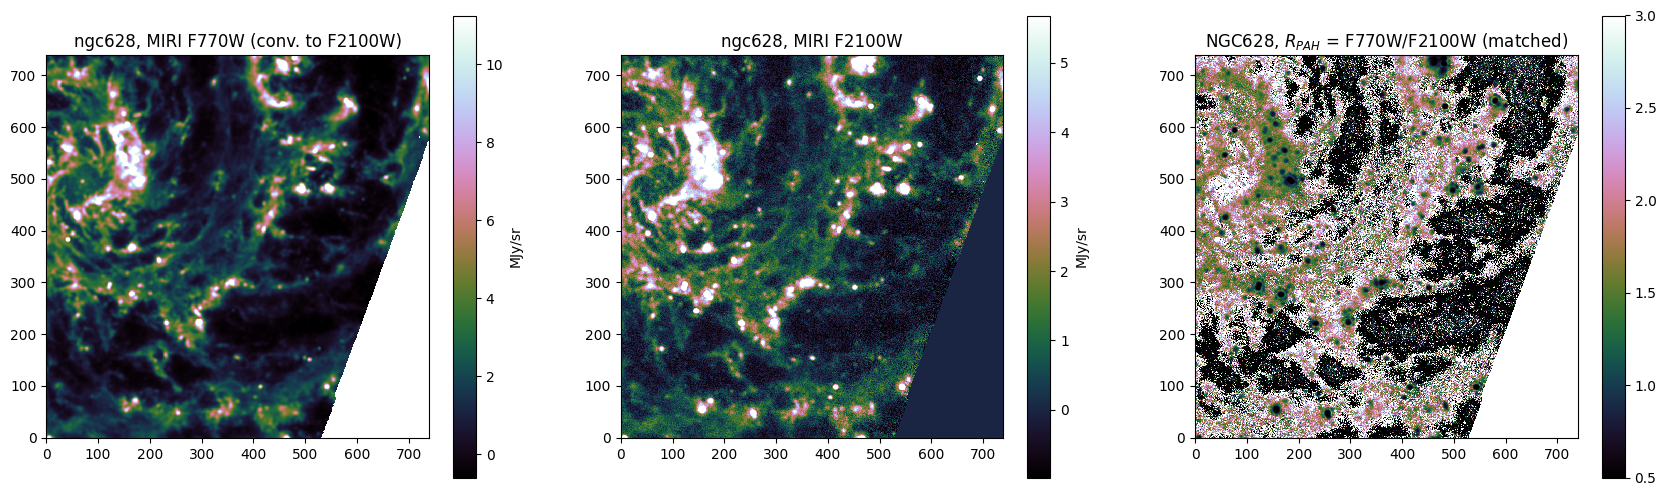

In [73]:
f770w = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_f770w_to_f2100w.fits'), 1)
f2100w = fits.getdata(os.path.join(jwst_data_dir, f"{galaxy}_f2100w.fits"), 1)

rpah = f770w/f2100w

# Select only part of the images to show (in pixels)
xslice = slice(800,1540)
yslice = slice(660,1400)


# Show images
fig = plt.figure(figsize=(21,6))
fig.add_subplot(131)
norm = ImageNormalize(f770w, stretch=LinearStretch(), interval=PercentileInterval(98.)) 
plt.imshow(f770w[yslice, xslice], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F770W (conv. to F2100W)")
plt.colorbar(label='MJy/sr')

fig.add_subplot(132)
norm = ImageNormalize(f2100w, stretch=LinearStretch(), interval=PercentileInterval(98.))
plt.imshow(f2100w[yslice, xslice], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F2100W")
plt.colorbar(label='MJy/sr')

fig.add_subplot(133)
plt.imshow(rpah[yslice, xslice], origin='lower', interpolation='nearest', vmin=0.5, vmax=3, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy.upper()}, $R_{{PAH}}$ = F770W/F2100W (matched)")
plt.colorbar()

We didn't consider here F1130W, another PAH-sensitive band, but it is on the disk as well - you are welcome to use it in $R_{PAH}$ calculations. 
Let's look now at its correlation with the F770W

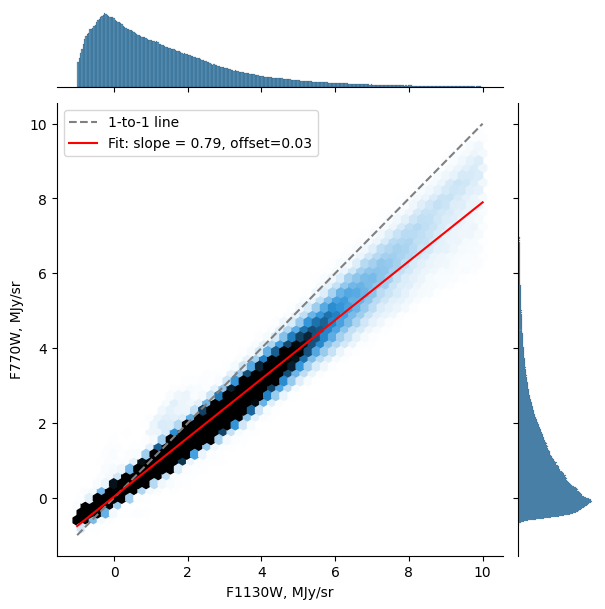

In [74]:
import seaborn as sns

f770w = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_f770w_to_f2100w.fits'), 'SCI').astype(float)
f1130w = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_f1130w_to_f2100w.fits'), 'SCI').astype(float)
    

rec = np.isfinite(f770w) & np.isfinite(f1130w) & (f1130w !=0) & (f770w !=0) & (f770w > -1) & (f1130w > -1) &  (f770w < 10) & (f1130w < 10)
sns.jointplot(x=f1130w[rec], y=f770w[rec], kind='hex', vmax=3000)
plt.plot([-1,10],[-1,10],'--', color='gray', label='1-to-1 line')
cf = np.polyfit(f1130w[rec], f770w[rec], 1)
p = np.poly1d(cf)
plt.plot([-1,10],p([-1,10]), 'r-', label=f'Fit: slope = {np.round(cf[0],2)}, offset={np.round(cf[1],2)}')
plt.xlabel('F1130W, MJy/sr')
plt.ylabel('F770W, MJy/sr')
plt.legend()

### Hint: how to estimate noise level in your images

If the noise is uniform across your images (and not correlated between different pixels), it is common way to use standard deviation of the brightness of any empty area in your data.
However, we often don't have such empty areas in MIRI images of nearby galaxies.

However, because of the tight relation between the mid-IR bands, we can estimate the noise level from the scatter of difference between two rescalled bands (see <a href=https://ui.adsabs.harvard.edu/abs/2023ApJ...944L...9L>Leroy et al. 2023</a> for details):

$I_{diff} = I_2 - a*I_1 - b$ => $\sigma(I_{diff}) = \sqrt{\sigma(I_2)^2 + a^2\sigma(I_1)^2}$ => $\sigma(I_{obs}) \sim  \sigma(I_{diff})/\sqrt{1+a^2}$
(assuming that noise level in $I_1$ and $I_2$ approximately the same)

Estimated noise level: 0.09
Median error propagated through pipeline: 0.13


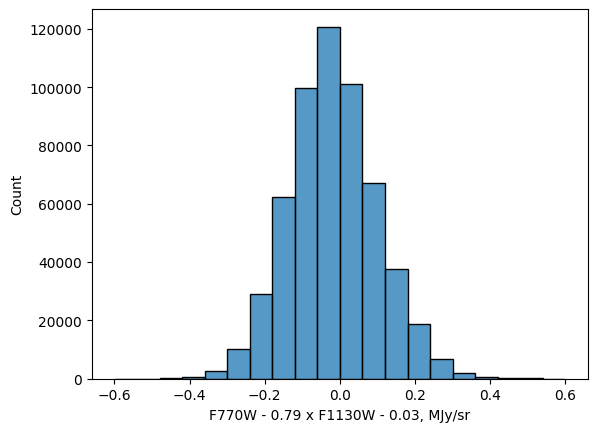

In [70]:
rec = np.isfinite(f770w) & np.isfinite(f1130w) & (f770w > 0) & (f1130w > 0) &  (f770w < 1) & (f1130w < 1)
sns.histplot(f770w[rec]-f1130w[rec]*cf[0]-cf[1], binrange=(-0.6,0.6),bins=20)
plt.xlabel(f"F770W - {np.round(cf[0],2)} x F1130W - {np.round(cf[1],2)}, MJy/sr")
print(f"Estimated noise level: {np.round(np.nanstd((f770w[rec]-f1130w[rec]*cf[0])/np.sqrt(1+cf[0]**2)),2)}")

f770w_err = fits.getdata(os.path.join(jwst_data_dir, f'{galaxy}_f770w.fits'),'ERR')

print(f"Median error propagated through pipeline: {np.round(np.nanmedian(f770w_err[rec]),2):.2}")


## Part 3. Background matching

Create kernel for JWST -> Spitzer PSF matching

In [112]:
os.chdir(psf_dir)

filters_match = {"F770W": "IRAC4", "F2100W": "MIPS24"}
# Loop over all bands 
for filter in filters_match.keys():
    # Circularize Spitzer PSF kernels, if this is not done yet
    if not os.path.isfile(f'spitzer/PSF_Original_{filters_match[filter]}_circ.fits'):
        with fits.open(f'spitzer/PSF_Original_{filters_match[filter]}.fits') as hdu:
            psf_circularized = circularize(hdu[0].data[:-1,:-1])
            hdu[0].data = psf_circularized
            hdu.writeto(f'spitzer/PSF_Original_{filters_match[filter]}_circ.fits', overwrite=True)
    file_kernel = os.path.join(kernels_dir, f'{filter}_to_{filters_match[filter]}_circ.fits')
    if os.path.isfile(file_kernel):
        os.remove(file_kernel)

    with fits.open(f'spitzer/PSF_Original_{filters_match[filter]}_circ.fits') as hdu:
        pxscale = np.round(hdu[0].header['CD1_1']*3600,4)

    os.system(f"pypher jwst/psf_miri_{filter}_circ.fits spitzer/PSF_Original_{filters_match[filter]}_circ.fits "
              f"kernels/{filter}_to_{filters_match[filter]}_circ.fits -r 1e-2")
    
    # In this tutorial, we trim kernels at 99% level to allow faster and less resourse demanding convolution. This precision is OK for our purpose
    postprocess_kernel(f"kernels/{filter}_to_{filters_match[filter]}_circ.fits", fileout=f"kernels/{filter}_to_{filters_match[filter]}_fin.fits", energy_tol=0.99, detector_pxscale=0.1109)

pypher: Output kernel saved to kernels/F770W_to_IRAC4_circ.fits
Trim kernel: old size 1279, new size 933
pypher: Output kernel saved to kernels/F2100W_to_MIPS24_circ.fits
Trim kernel: old size 3999, new size 901


Convolve JWST images: F770W -> IRAC4; F2100W -> MIPS24

In [63]:
from astropy.convolution import convolve_fft
from astropy.wcs import WCS
from scipy.ndimage import zoom
from reproject import reproject_interp

galaxy = 'ngc4254'
filters_match = {"F770W": "IRAC4", "F2100W": "MIPS24"}
for filter in filters_match:
    file_kernel = os.path.join(kernels_dir, f"{filter}_to_{filters_match[filter]}_fin.fits")
    kernel = fits.getdata(file_kernel)

    with fits.open(os.path.join(spitzer_data_dir, f'{galaxy}_{filters_match[filter].lower()}.fits')) as hdu:
        target_shape = hdu[0].data.shape
        target_wcs = WCS(hdu[0].header)

    with fits.open(os.path.join(jwst_data_dir, f'{galaxy}_{filter}.fits')) as hdu:
        print(f'Start with {filter}')
        data = hdu['SCI'].data
        # mask all zero values before the convolution
        hdu['ERR'].data[data==0] = np.nan
        data[data == 0] = np.nan
        conv_im = convolve_fft(data, kernel=kernel, preserve_nan=True, fill_value=np.nan)
        # Convolve errors:
        conv_err = np.sqrt(convolve_fft(hdu['ERR'].data**2, kernel**2, preserve_nan=True, normalize_kernel=False))
        
        hdulist_out = fits.HDUList([fits.PrimaryHDU(header=hdu[0].header)])
        # Reprojection to Spitzer wcs grid
        repr_data, fp = reproject_interp((conv_im, hdu['SCI'].header), output_projection=target_wcs, shape_out=target_shape) 
        fp = fp.astype(bool)
        repr_data[~fp] = np.nan
        header = hdu['SCI'].header
        header.update(target_wcs.to_header())
        hdulist_out.append(fits.ImageHDU(data=repr_data, header=header, name='SCI'))

        repr_err = reproject_interp((conv_err, hdu['SCI'].header), output_projection=target_wcs, shape_out=target_shape, return_footprint=False)
        repr_err[~fp] = np.nan
        header = hdu['ERR'].header
        hdulist_out.append(fits.ImageHDU(data=repr_err, header=header, name='ERR'))

        hdulist_out.writeto(os.path.join(convolved_data_dir, f'{galaxy}_{filter}_to_{filters_match[filter]}.fits'), overwrite=True)

Start with F770W


/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_4737/232689963.py:23: RuntimeWarning: invalid value encountered in sqrt
  conv_err = np.sqrt(convolve_fft(hdu['ERR'].data**2, kernel**2, preserve_nan=True, normalize_kernel=False))


Start with F2100W


### Compare convolved JWST and Spitzer images and derive background offsets

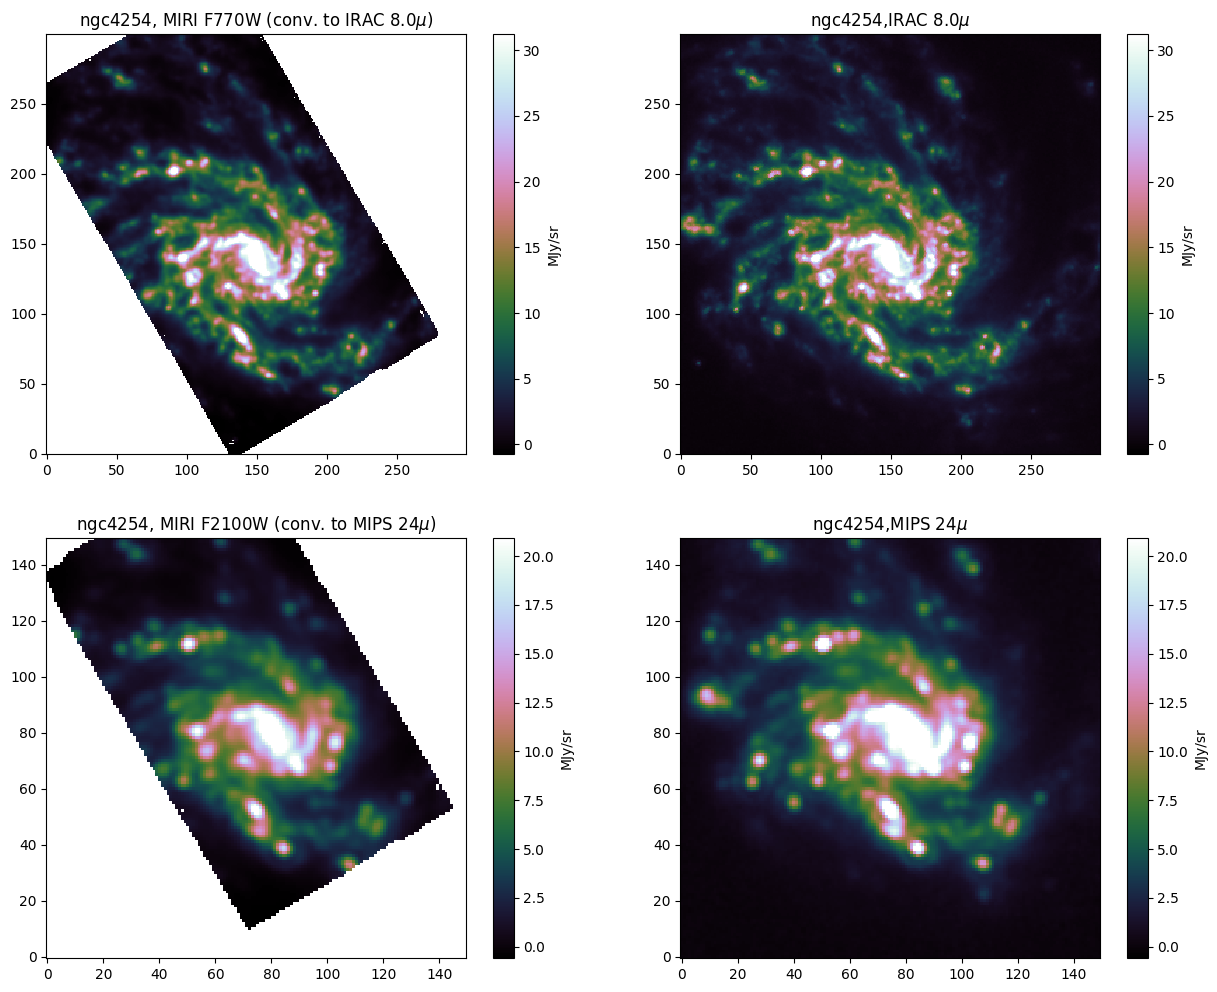

In [67]:
galaxy = 'ngc4254'

# Read convolved JWST images
f770w_conv = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_F770W_to_IRAC4.fits'), 1)
f2100w_conv = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_F2100W_to_MIPS24.fits'), 1)

# Read errors
f770w_conv_err = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_F770W_to_IRAC4.fits'), 2)
f2100w_conv_err = fits.getdata(os.path.join(convolved_data_dir, f'{galaxy}_F2100W_to_MIPS24.fits'), 2)

# Read Spitzer images
irac4 = fits.getdata(os.path.join(spitzer_data_dir, f'{galaxy}_irac4.fits'))
mips24 = fits.getdata(os.path.join(spitzer_data_dir, f'{galaxy}_mips24.fits'))

# Select only part of the images to show (in pixels)
xslice_f770w = slice(720,1020)
yslice_f770w = slice(450,750)
xslice_f2100w = slice(100,250)
yslice_f2100w = slice(100,250)


# Show images
fig = plt.figure(figsize=(15,12))
fig.add_subplot(221)
norm = ImageNormalize(f770w_conv, stretch=LinearStretch(), interval=PercentileInterval(98.)) 
plt.imshow(f770w_conv[yslice_f770w, xslice_f770w], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F770W (conv. to IRAC 8.0$\mu$)")
plt.colorbar(label='MJy/sr')

fig.add_subplot(222)
plt.imshow(irac4[yslice_f770w, xslice_f770w], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy},IRAC 8.0$\mu$")
plt.colorbar(label='MJy/sr')

fig.add_subplot(223)
norm = ImageNormalize(f2100w_conv, stretch=LinearStretch(), interval=PercentileInterval(98.))
plt.imshow(f2100w_conv[yslice_f2100w, xslice_f2100w], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy}, MIRI F2100W (conv. to MIPS 24$\mu$)")
plt.colorbar(label='MJy/sr')

fig.add_subplot(224)
plt.imshow(mips24[yslice_f2100w, xslice_f2100w], origin='lower', interpolation='nearest', norm=norm, cmap=plt.cm.cubehelix)
plt.title(f"{galaxy},MIPS 24$\mu$")
plt.colorbar(label='MJy/sr')

__Exercise:__ measure background offset in MIRI images. Working solution is given below. 
Steps:
1. Look at correlations of F770W vs IRAC4 and F2100W vs MIPS24. They must follow each other very well 
2. Fit linear regression to the data. Derived offset will be your desired value, because:
    - if background offset is 0, then $JWST_{obs} = JWST_{true} \propto Spitzer_{true}$ because of the similarity of the considered bands
    - With background offset, $JWST_{obs} = JWST_{true} + bgr \simeq A * Spitzer_{true} + bgr$

Hints:
- Pre-filter your data by removing NaNs, zeros and values with low S/N (e.g., less than 10)
- For linear regression, better exclude the brightest pixels
- Here you can use numpy.polyfit to fit regression. However, in general, algoritms that fit linear regression with outlier rejections produce more robust results. As example, <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py">RANSAC</a> algorithm from _sklearn_ works very well




Working solution

Derived background offset for ngc4254 MIRI F770W: -1.15 MJy/sr
Derived background offset for ngc4254 MIRI F2100W: -0.63 MJy/sr


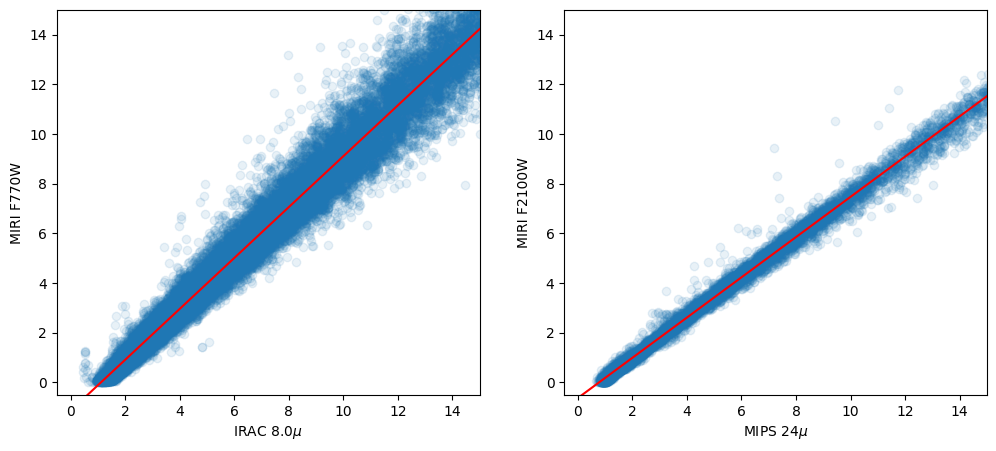

In [68]:
# import linear_model to do robust linear regression with outlier rejection
from sklearn import linear_model 

# Do analysis first for F770W and IRAC 8.0 mkm, and then for F2100W and MIPS 24 mkm pairs. 
# Put data into lists to loop over them
all_x = [irac4, mips24]
all_y = [f770w_conv, f2100w_conv]
all_yerr = [f770w_conv_err, f2100w_conv_err]

filter_x = [r'IRAC 8.0$\mu$', r'MIPS 24$\mu$']
filter_y = ['MIRI F770W', 'MIRI F2100W']

fig, ax = plt.subplots(1,2, figsize=(12,5))

# loop over these lists
for ind in range(len(all_x)):
    x = all_x[ind]
    y = all_y[ind]
    yerr = all_yerr[ind]
    # mask data by removing NaNs, zeros, and values with low S/N < 10 in JWST bands
    # note that S/N < 5 will remove all negative values. At the same time, some of these points could be real (if background offset is negative). 
    # However, this doesn't affect the results of regression
    mask = np.isfinite(x) & np.isfinite(y) & (x != 0) & (y !=0) & np.isfinite(yerr) & (y/yerr >= 10)

    # plot selected data. Limit to the moderate brightness levels (e.g. below 15 MJy/st)
    limits = np.array([-0.5, 15])
    plt.sca(ax[ind])
    plt.scatter(x[mask], y[mask], alpha=0.1)
    plt.xlabel(filter_x[ind])
    plt.ylabel(filter_y[ind])
    plt.xlim(limits)
    plt.ylim(limits)
    
    # remove bright pixels from the fitting
    mask_for_fit = mask & (x < 15) & (y < 15)
    
    # fit linear regression using RANSAC algorithm with outlier rejection
    ransac = linear_model.RANSACRegressor()
    ransac.fit(x[mask_for_fit].reshape(-1,1), y[mask_for_fit].reshape(-1,1))

    cf = ransac.estimator_.coef_[0][0]     # normalization coefficient between Spitzer and JWST bands
    bgr = ransac.estimator_.intercept_[0]  # background offset level
    
    # overplot regression
    plt.plot(limits, cf*limits + bgr,'r-')
    
    print(f"Derived background offset for {galaxy} {filter_y[ind]}: {np.round(bgr,2)} MJy/sr")

As we can see, our JWST images can have measurable background offsets. While it is not critical for analysis of the bright (in mid-IR) regions, accounting for such offset is important for evaluating the mid-IR brightnesses, and especially their ratios (e.g. $R_{PAH}$) in diffuse ISM.

In order to correct for the offest, we can subtract the derived values from the original (and convolved) images. 
From that point, we will use in the further analysis background-corrected images in directories defined in _jwst\_data\_bgrcorr\_dir_ and _convolved\_bgrcorr\_data\_dir_ variables (_bgrcorr_ and _convolved\_bgrcorr_ in _PHANGS-JWST_ folder)

## Part 4. Mid-IR bands vs $\rm H\alpha$ correlation 

Again, to directly compare images in different wavelenght and from different instuments, we need first to math their PSF. 
This time, we compare the JWST/MIRI and MUSE Halpha images (from PHANGS-JWST and PHANGS-MUSE). 

The MUSE data were pre-processed in a way that resulting PSF is homogeneous Gaussian accross the field of view and wavelengths (see details in <a href='https://ui.adsabs.harvard.edu/abs/2022A%26A...659A.191E'>Emsellem et al. 2022</a>). Therefore, in order to convolve JWST images to the MUSE resolution, we can follow these steps:

1. Create Gaussian PSF (_already available in PSF/gaus directory_)
    - FWHM (in arcsec) of this PSF must be equal to that in the data (it is specified in the filenames)
    - For simplicity, make Gaussian PSF array of the same shape and pixel size as the source (JWST) PSF
2. Use pypher (or other soft) to create kernels from circularized JWST PSFs to Gaussian PSF. 
3. Postprocess kernel (trim, circularize, resample to the original pixelscale)
4. Convolve images (F770W and F2100W) to the MUSE $H\alpha$ resolution
5. Reproject the convolved images to the MUSE wcs grid

__Exercise:__ try to implement these steps. Working solution is given bellow

In [116]:
galaxy = 'ngc4254' # choose any galaxy among available

# Use this directories to not break file structure for following excersises 
convolved_data_dir = convolved_bgrcorr_data_dir # redefine to use the background corrected data
jwst_data_dir = jwst_bgrcorr_data_dir # redefine to use the background corrected data
jwst_psf_dir = os.path.join(psf_dir, 'jwst') # directory with jwst PSFs
muse_psf_dir = os.path.join(psf_dir, 'gauss') # directory with jwst PSFs
# kernels_dir =  os.path.join(psf_dir,'kernels') # directory with kernels; already definded



Working solution:

  0%|          | 0/3 [00:00<?, ?it/s]

/Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f770w_to_gaus_0.89_circ.fits
pypher: Output kernel saved to /Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f770w_to_gaus_0.89_circ.fits
Trim kernel: old size 719, new size 667
/Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f2100w_to_gaus_0.89_circ.fits
pypher: Output kernel saved to /Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f2100w_to_gaus_0.89_circ.fits
Trim kernel: old size 719, new size 691
/Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f1130w_to_gaus_0.89_circ.fits
pypher: Output kernel saved to /Users/mors/Science/PyWorkspace/JWST_school/data/PSF/kernels/f1130w_to_gaus_0.89_circ.fits
Trim kernel: old size 719, new size 677


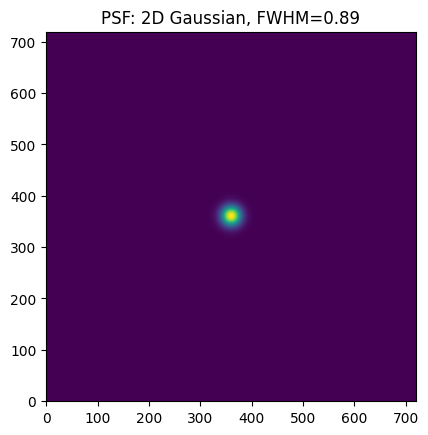

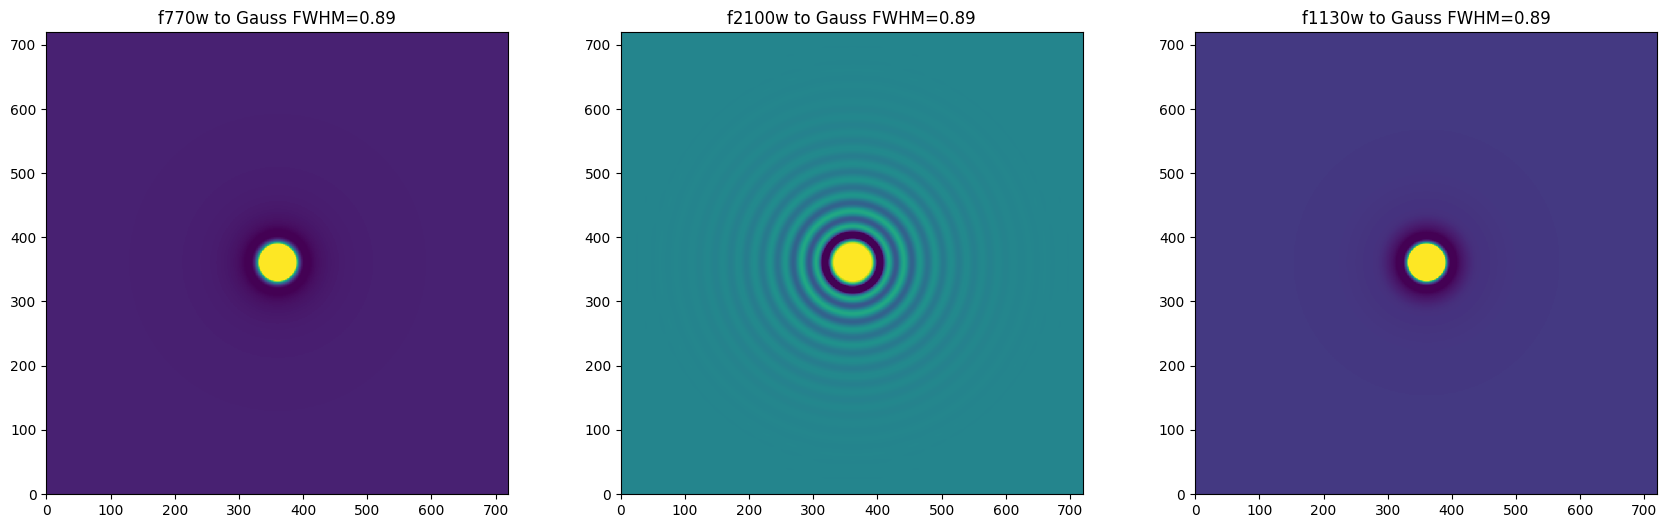

In [117]:
# === Create gaussian PSF based on the shape and pixscale of the JWST PSFs ===
#  Note: all JWST PSFs considered here have the same shape and pixel scale
all_jwst_psfs = glob.glob(os.path.join(jwst_psf_dir,"*_circ.fits"))

# Halpha file for current galaxy
file_ha = glob.glob(os.path.join(muse_data_dir, f'{galaxy}*obs.fits'))[0]

# get PSF FWHM from the filename and convert it to sigma
g_fwhm = float(re.search("(\d\.\d\d)",file_ha).group()) 
g_sigma = g_fwhm / 2 / np.sqrt(2 * np.log(2))

# === Create gaussian PSF with the same shape and pixscale as the JWST PSFs ===
with fits.open(all_jwst_psfs[0]) as hdu:
    shape = hdu[0].shape
    pxscale = hdu[0].header.get('pixelscl')

xx, yy = np.meshgrid(np.arange(shape[1]) * pxscale, np.arange(shape[0]) * pxscale, indexing='xy')
yc, xc = shape[1]*pxscale/2, shape[0]*pxscale/2
rad = np.min([xc, yc])

g_psf = np.exp( - ((xx - xc) ** 2 + (yy - yc) ** 2) /  2 / g_sigma ** 2)
g_psf[((xx - xc) ** 2 + (yy - yc) ** 2) > (rad ** 2)] = 0
g_psf = g_psf / np.nansum(g_psf) # normalize PSF

f_psf_ha = os.path.join(muse_psf_dir, f'gaus_{g_fwhm}.fits') # where to save this just created PSF
fits.writeto(f_psf_ha, g_psf, overwrite=True)
plt.imshow(g_psf, origin='lower', interpolation='nearest')
plt.title(f"PSF: 2D Gaussian, FWHM={g_fwhm}")


# === Create kernels with pypher for all available circularized and oversampled JWST PSFs === 
kernels = {}
os.system(f"addpixscl {f_psf_ha} {pxscale}")
for f_psf_jwst in tqdm(all_jwst_psfs):
    filter = re.search('(f\d+w)',f_psf_jwst).group() # get name of the current MIRI filter from the filename
    file_kernel = os.path.join(kernels_dir, f'{filter}_to_gaus_{g_fwhm}_circ.fits') # name of the kernel for JWST -> MUSE tranformation
    print(file_kernel)
    # remove old kernel, if already exists
    if os.path.isfile(file_kernel):
        os.remove(file_kernel)

    os.system(f"pypher {f_psf_jwst} {f_psf_ha} {file_kernel} -r 0.01") # Run pypher 
    

    # Post-process kernel: trim, circularize, resample, normalize
    postprocess_kernel(file_kernel, fileout=file_kernel.split('_circ.fits')[0]+'_fin.fits')
    
    # Add just created kernel to the dictionary for further usage in a loop
    kernels[filter] = fits.getdata(file_kernel)

# Loop over all created kernels and visualize them
fig = plt.figure(figsize=(21,6))
for ind, filter in enumerate(kernels.keys()):
    ax = fig.add_subplot(100+len(kernels.keys())*10+ind+1)
    norm = ImageNormalize(kernels[filter], interval=PercentileInterval(99.))
    plt.imshow(kernels[filter], origin='lower', interpolation='nearest', norm=norm)
    plt.title(f'{filter} to Gauss FWHM={g_fwhm}')


Do convolution with the kernels above

In [122]:
from reproject import reproject_interp
from astropy.convolution import convolve_fft

files_jwst = glob.glob(os.path.join(jwst_bgrcorr_data_dir,f"{galaxy.lower()}*w.fits"))

# filename, PSF FWHM, wcs and shape of Halpha file for this galaxy
file_ha = glob.glob(os.path.join(muse_data_dir, f"{galaxy}*obs.fits"))[0] 
g_fwhm = float(re.search("(\d\.\d\d)",file_ha).group()) # FWHM of MUSE PSF, from the filename
wcs_ha = WCS(fits.getheader(file_ha))
shape_ha = fits.getdata(file_ha).shape

for f in tqdm(files_jwst):
    # find name of the filter in the filename
    filter = re.search('(f\d+w)',f).group()

    # Read kernel
    file_kernel = os.path.join(kernels_dir, f"{filter}_to_gaus_{g_fwhm}_fin.fits")
    kernel = fits.getdata(file_kernel)

    # Read JWST image and process it
    with fits.open(f) as hdu:
        # make sure that all zero values are masked
        data = hdu['SCI'].data
        data[data == 0] = np.nan
        conv_im = convolve_fft(data, kernel, preserve_nan=True, fill_value=np.nan)

        # Convolve errors
        conv_err = np.sqrt(convolve_fft(hdu['ERR'].data**2, kernel**2, preserve_nan=True, fill_value=np.nan, normalize_kernel=False))
        
        # Reprojection to MUSE wcs grid
        repr_im, fp = reproject_interp((conv_im, hdu['SCI'].header), wcs_ha, shape_ha)
        fp = fp.astype(bool)
        repr_im[~fp] = np.nan
        repr_err = reproject_interp((conv_err, hdu['SCI'].header), wcs_ha, shape_ha, return_footprint=False)
        repr_err[~fp] = np.nan
        
        # Save to new fits
        header_sci = hdu['SCI'].header
        header_sci.update(wcs_ha.to_header())
        header_out = fits.HDUList([fits.PrimaryHDU(header=hdu[0].header), 
                                   fits.ImageHDU(data=repr_im, header=header_sci, name="SCI"),
                                   fits.ImageHDU(data=repr_err, header=hdu['ERR'].header, name='ERR')])

        header_out.writeto(os.path.join(convolved_bgrcorr_data_dir, f'{galaxy}_{filter}_to_MUSE.fits'), overwrite=True)


  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_4737/1192769450.py:30: RuntimeWarning: invalid value encountered in sqrt
  conv_err = np.sqrt(convolve_fft(hdu['ERR'].data**2, kernel**2, preserve_nan=True, fill_value=np.nan, normalize_kernel=False))
Set DATE-AVG to '2022-07-06T21:02:20.707' from MJD-AVG.
Set DATE-END to '2022-07-06T21:30:13.054' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.354343 from OBSGEO-[XYZ].
Set OBSGEO-H to 1740960469.842 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-06T21:35:02.015' from MJD-AVG.
Set DATE-END to '2022-07-06T22:04:51.644' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.354522 from OBSGEO-[XYZ].
Set OBSGEO-H to 1740987127.905 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-06T21:22:25.812' from MJD-AVG.
Set DATE-END to '2022-07-06T21:52:11.261' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.354451 from OBSGEO-[XYZ].
Set OBSGEO-H to 1740976395.970 from OBSGEO-[XYZ]'. [astropy.wcs.w

__Exercise:__ How Mid-IR bands depend on $H\alpha$? Do they trace SFR or not? What about $R_{PAH}$? 
(Working solution are below)

Text(0.5, 36.72222222222221, '$\\log$I(H$\\alpha$), erg/s/cm$^2$/arcsec$^2$')

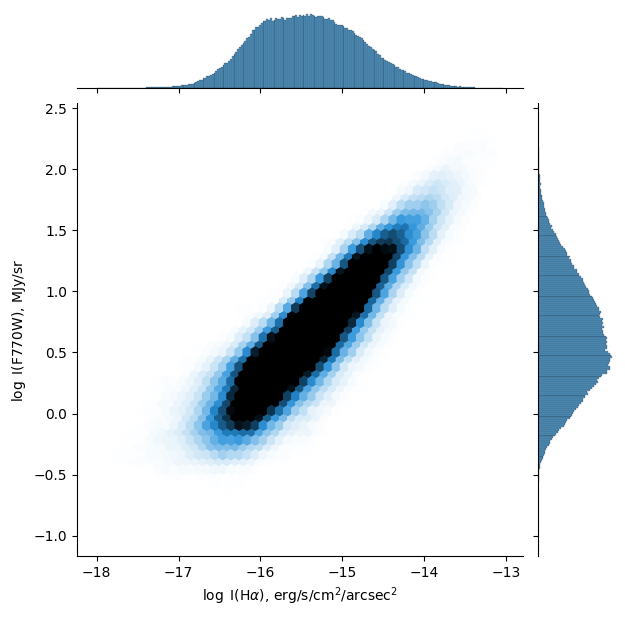

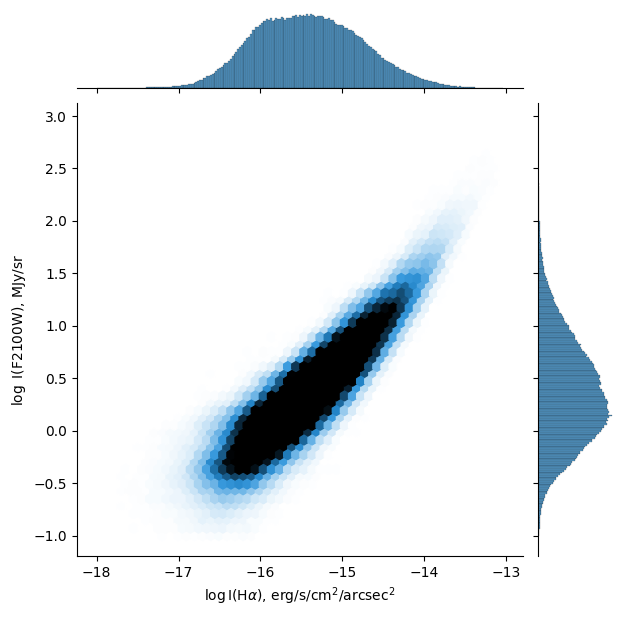

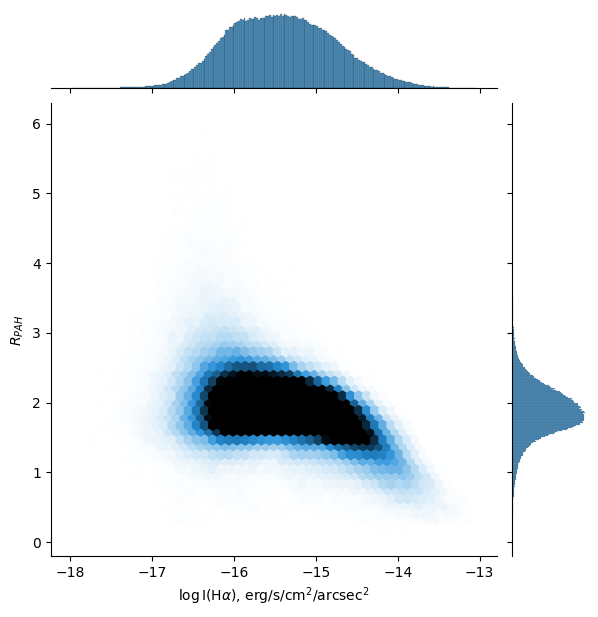

In [81]:
from sklearn import linear_model
import seaborn as sns
galaxy = 'ngc4254'
file_ha = glob.glob(os.path.join(muse_data_dir, f"{galaxy}*corr.fits"))[0]
img_muse = fits.getdata(file_ha)
img_muse_err = fits.getdata(file_ha, 1)
img_jwst_770 = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{galaxy}_f770W_to_MUSE.fits'),1)
img_jwst_2100 = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{galaxy}_f2100W_to_MUSE.fits'),1)
img_jwst_770_err = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{galaxy}_f770W_to_MUSE.fits'),2)
img_jwst_2100_err = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{galaxy}_f2100W_to_MUSE.fits'),2)

rpah = img_jwst_770/img_jwst_2100


rec = np.isfinite(img_jwst_2100) & np.isfinite(img_jwst_770) & np.isfinite(img_muse) & (img_muse/img_muse_err > 10) & (img_jwst_770 > 0.1) & (img_jwst_2100 > 0.1) & (img_muse>1e-18)

x = np.log10(img_muse[rec])
y = np.log10(img_jwst_770[rec])
sns.jointplot(x=x,y=y, kind='hex',vmax=1500)
plt.ylabel(r'$\log$ I(F770W), MJy/sr')
plt.xlabel(r'$\log$ I(H$\alpha$), erg/s/cm$^2$/arcsec$^2$')

y = np.log10(img_jwst_2100[rec])
sns.jointplot(x=x,y=y, kind='hex',vmax=1500)
plt.ylabel(r'$\log$ I(F2100W), MJy/sr')
plt.xlabel(r'$\log$I(H$\alpha$), erg/s/cm$^2$/arcsec$^2$')

rec = rec & (rpah < 6)
x = np.log10(img_muse[rec])
y = (rpah[rec])
sns.jointplot(x=x,y=y, kind='hex',vmax=1500)
plt.ylabel(r'$R_{PAH}$')
plt.xlabel(r'$\log$I(H$\alpha$), erg/s/cm$^2$/arcsec$^2$')



- mid-IR bands (esp. F2100W) correlate very well with the extinction-corrected $H\alpha$ and thus can be served as perfect indicators of embedded star-formation (e.g. <a href=https://ui.adsabs.harvard.edu/abs/2023arXiv230611811B>Belfiore et al. (2023)</a>)
- Meanwhile, $R_{PAH}$ decrease with $H\alpha$ brightness. We will explore this below

## Part 5. $\rm R_{PAH}$ in different galaxies

__Excersise:__ Are the any differences in $R_{PAH}$ in different galaxies? 
- Compare $R_{PAH}$ distribution (at MUSE resolution) for all 4 galaxies. How would you interpret the results?
- Plot $R_{PAH}$ vs F($H\alpha$) for these 4 galaxies. Are there any differences in comparison to the plot obtained above? 

Working solution

In [76]:
# Function to calculate the average value in bins for scatter plots
def calc_mean(x, y, nbins=30, bins = None):
    """
    Divide the x axis into sections and return groups of y based on its x value
    """
    if bins is None:
        bins = np.linspace(np.nanmin(x), np.nanmax(x), nbins)

    bin_space = (bins[-1] - bins[0])/(len(bins)-1)/2

    indicies = np.digitize(x, bins + bin_space)
    mean = []
    for i in range(0, len(bins)):
        if np.sum(indicies==i) < 10:
            mean.append(np.nan)
        else:
            mean.append(np.nanmean(y[indicies==i]))
    return bins, mean
    


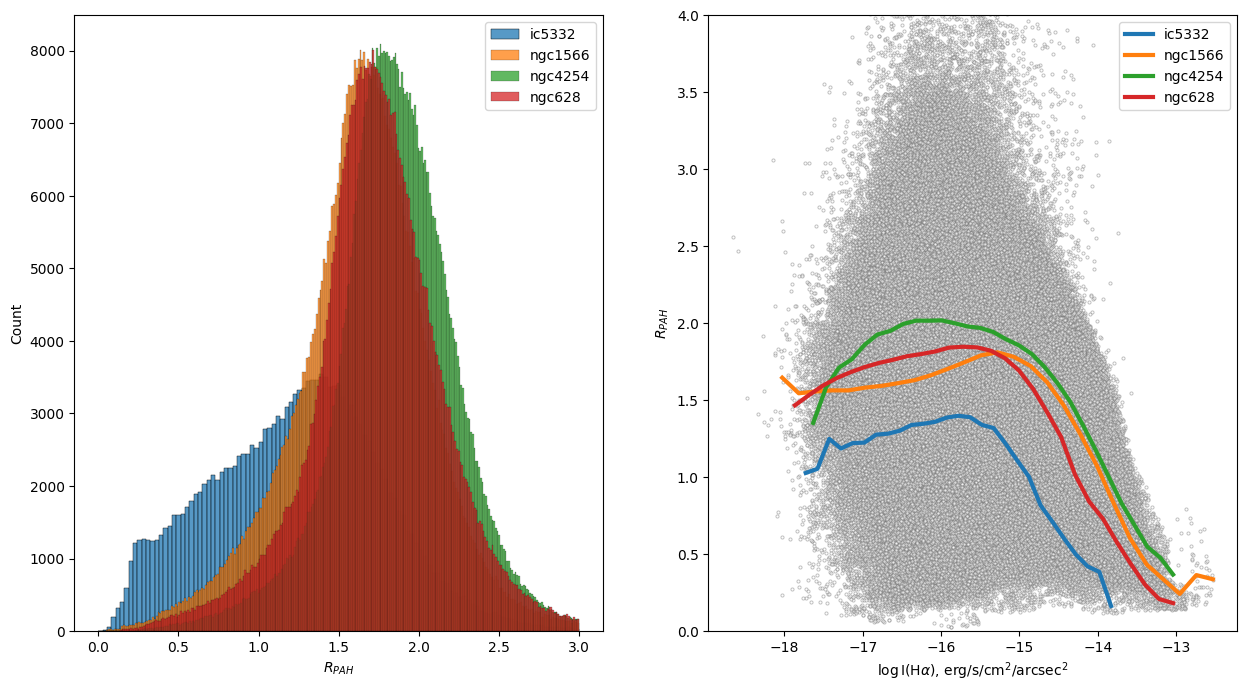

In [79]:
# Get list of all galaxies available in jwst directory
all_jwst_files = glob.glob(os.path.join(jwst_bgrcorr_data_dir, '*_f2100w.fits'))
gal_names = np.unique([f.split('/')[-1].split('_')[0] for f in all_jwst_files])

SN_lim = 5
SN_lim_muse=15
fig, ax = plt.subplots(1,2, figsize=(15,8))
for ind, gal in enumerate(gal_names):
    
    img_770 = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f770w_to_MUSE.fits'),1)
    # Read Halpha image corrected for extinction
    file_ha = glob.glob(os.path.join(muse_data_dir, f'{gal}*corr.fits'))[0] 
    img_ha = fits.getdata(file_ha)
    img_ha_err = fits.getdata(file_ha, 1)
    img_2100 = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f2100w_to_MUSE.fits'),1)
    img_770_err = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f770w_to_MUSE.fits'),2)
    img_2100_err = fits.getdata(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f2100w_to_MUSE.fits'),2)

    # select only the pixels with S/N above low limits
    mask = np.isfinite(img_770) & np.isfinite(img_2100) & (img_770/img_770_err > SN_lim) & (img_2100/img_2100_err > SN_lim) 

    rpah = img_770/img_2100
    plt.sca(ax[0])
    sns.histplot(rpah[mask], label=gal,binrange=[0,3], ax=ax[0])
    cm = plt.get_cmap()

    if ind == (len(gal_names) - 1):
        plt.xlabel(r"$R_{PAH}$")
        plt.legend()

    plt.sca(ax[1])
    mask = mask & np.isfinite(img_ha) & (img_ha/img_ha_err > SN_lim_muse)
    
    # calculate average values in bins
    mx, my = calc_mean(np.log10(img_ha[mask]), rpah[mask], nbins=30, bins = None)
    plt.plot(mx,my, '-', linewidth=3, label=gal)
    plt.scatter(np.log10(img_ha[mask]), rpah[mask], facecolors='white', edgecolors='gray', s = 5, lw = 0.7, alpha=0.5, rasterized=True)

    if ind == (len(gal_names) - 1):
        plt.xlabel(r"$\log$I(H$\alpha$), erg/s/cm$^2$/arcsec$^2$")
        plt.ylabel(r"$R_{PAH}$")
        plt.legend()
        plt.ylim(0,4)

From these plots, we can see two things: 
 - PAH fraction (traced by $R_{PAH}) is typically lower in IC5332 than in other galaxies. This galaxy has lowest metallicity among these four ($Z \sim 0.4Z_\odot$ vs $Z \sim 0.8 Z_\odot$). Lower metallicity is likely reason for lower PAH fraction in IC5332 (see more details in <a href="https://ui.adsabs.harvard.edu/abs/2023ApJ...944L..11C">Chastenet et al. 2023</a>)
 - $R_{PAH}$ decreases in the regions bright in $H\alpha$. This is likely due to their destruction by extreme UV radiation (see <a href="https://ui.adsabs.harvard.edu/abs/2023ApJ...944L..16E">Egorov et al. 2023</a>)

## Part 6. $\rm R_{PAH}$ in HII regions

In order to better explore the declining $R_{PAH}$ with $H\alpha$, lets focus on HII regions only. 
<a href="https://ui.adsabs.harvard.edu/abs/2023MNRAS.520.4902G">Groves et al. (2023)</a> compiled a catalog of the nebulae in all 19 PHANGS-MUSE galaxies. It contains their measured (e.g. line fluxes etc.) and derived (e.g. metallicity, ionization parameter etc.) properties, together with the masks defining the borders of the regions. 
The full catalog and masks for 4 galaxies are avaiable in _PHANGS-MUSE_ folder.
Masks has values _region\_ID_ (if the pixel is related to corresponding region from the catalog) or 0 (if the pixel is not in HII region). The catalog is considered below

In [140]:
from astropy.table import Table
hii_catalog = Table.read(os.path.join(muse_data_dir,'Nebulae_catalogue.fits'))
hii_catalog.info()

# select only nebulae that were classified as HII regions (not SNRs)
hii_catalog = hii_catalog[hii_catalog['HII_class_v3'] == 1]


<Table length=31497>
         name           dtype          unit           class     n_bad
---------------------- ------- ------------------- ------------ -----
              gal_name bytes32                           Column     0
             region_ID float64                           Column     0
                 cen_x float64                 pix       Column     0
                 cen_y float64                 pix       Column     0
                cen_ra float64                 deg       Column     0
               cen_dec float64                 deg       Column     0
             cen_x_geo float64                 pix       Column     0
             cen_y_geo float64                 pix       Column     0
             flag_edge float64                           Column     0
           flag_nearby float64                           Column     0
             flag_star float64                           Column     0
           deproj_dist float64              arcsec       Column     0

__Excersice__: How PAHs behave in HII regions?
1. Select HII regions from this catalog for 4 galaxies presented here. Among them, select only regions that satisfy following criteria:
- Large enough (_region_circ_rad_ > 1 arcsec) to be considered as resolved (not much affected by diffuse ISM)
- S/N > 15 in $H\alpha$ line and S/N > 5 in other lines of our interest here ([SII]6716, 6730; [SIII]9068)
2. Extract gas-phase metallicity (met_scal) and ionization parameter (logarithm of ratio of [SIII]9068/[SII]6716+6730) for the selected regions. 
3. Measure $R_{PAH}$ for these regions (from the data convolved to MUSE resolution). Just integrate the flux in the pixels corresponding to the masks for each region
4. Plot $R_{PAH}$ vs ionization parameter (and metallicity).

Working solution

In [141]:
from reproject import reproject_interp
# Get list of all galaxies available in jwst directory
all_jwst_files = glob.glob(os.path.join(jwst_bgrcorr_data_dir, '*_f2100w.fits'))
gal_names = np.unique([f.split('/')[-1].split('_')[0] for f in all_jwst_files])

snr_lim = 10

rpahs = []
mets = []
ips = []

for gal in tqdm(gal_names):
    if gal == 'ngc628':
        gal_in_cat = 'NGC0628'
    else:
        gal_in_cat = gal.upper()
    # select only those rows related to HII regions from current galaxy
    cat_selected = hii_catalog[hii_catalog['gal_name'] == gal_in_cat]
    # Get list of all HII region IDs in this galaxy
    region_ids = np.unique(cat_selected['region_ID'])

    # read HII regions mask
    with fits.open(os.path.join(muse_data_dir, f'{gal}_HIIregs_mask.fits')) as hdu:
        hii_mask = hdu[0].data
        hii_mask_wcs = WCS(hdu[0].header)

    # read f770w and f2100w images (convolved and reprojected to MUSE grid)
    with fits.open(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f770w_to_MUSE.fits')) as hdu:
        f770w = hdu['SCI'].data
        f770w_err = hdu['ERR'].data
        
    with fits.open(os.path.join(convolved_bgrcorr_data_dir, f'{gal}_f2100w_to_MUSE.fits')) as hdu:
        f2100w = hdu['SCI'].data
        f2100w_err = hdu['ERR'].data
        f2100_wcs = WCS(hdu['SCI'].header)

    # iterate over the regions:
    for reg_id in region_ids:
        cur_mask = hii_mask ==reg_id

        # skip the regions if they span less than 10 pixels
        if np.nansum(cur_mask) < 10:
            continue

        cur_cat_selection = cat_selected['region_ID'] == reg_id
        # Do not consider regions with diameter less than 2 arcsec
        if cat_selected['region_circ_rad'][cur_cat_selection] < 1.:
            continue
        # skip the regions with low S/N in any involved line or JWST MIRI band
        snr_ha = (cat_selected['HA6562_FLUX_CORR']/cat_selected['HA6562_FLUX_CORR_ERR'])[cur_cat_selection]
        if snr_ha < 15:
            continue
        snr_s3 = (cat_selected['SIII9068_FLUX_CORR']/cat_selected['SIII9068_FLUX_CORR_ERR'])[cur_cat_selection]
        if snr_s3 < 5:
            continue
        snr_s2 = (cat_selected['SII6716_FLUX_CORR']/cat_selected['SII6716_FLUX_CORR_ERR'])[cur_cat_selection]
        if snr_s2 < 5:
            continue
        snr_s2 = (cat_selected['SII6730_FLUX_CORR']/cat_selected['SII6730_FLUX_CORR_ERR'])[cur_cat_selection]
        if snr_s2 < 5:
            continue
        
        
        
        f770w_cur = np.nansum(f770w[cur_mask])
        f770w_cur_err = np.sqrt(np.nansum(f770w_err[cur_mask]**2))
        if f770w_cur/f770w_cur_err < snr_lim:
            continue
        
        f2100w_cur = np.nansum(f2100w[cur_mask])
        f2100w_cur_err = np.sqrt(np.nansum(f2100w_err[cur_mask]**2))
        if f2100w_cur/f2100w_cur_err < snr_lim:
            continue
        
        # Calculate R_PAH for the selected regions
        rpah_cur = (f770w_cur)/f2100w_cur
        
        # get metallicity from the catalog
        met_cur = cat_selected['met_scal'][cur_cat_selection]
        # get empirical tracer of the ionization parameter ([SIII]/[SII])
        ip_cur = np.log10((cat_selected['SIII9068_FLUX_CORR']/(cat_selected['SII6716_FLUX_CORR'] + cat_selected['SII6730_FLUX_CORR']))[cur_cat_selection])

        rpahs.append(rpah_cur)
        mets.append(met_cur)
        ips.append(ip_cur)


  0%|          | 0/4 [00:00<?, ?it/s]

Set OBSGEO-B to   -38.354522 from OBSGEO-[XYZ].
Set OBSGEO-H to 1740987127.905 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/3220336848.py:67: RuntimeWarning: invalid value encountered in scalar divide
  if f770w_cur/f770w_cur_err < snr_lim:
/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/3220336848.py:72: RuntimeWarning: invalid value encountered in scalar divide
  if f2100w_cur/f2100w_cur_err < snr_lim:
/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/3220336848.py:76: RuntimeWarning: invalid value encountered in scalar divide
  rpah_cur = (f770w_cur)/f2100w_cur
Set OBSGEO-B to    19.723355 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564151617.100 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.640463 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725520403.108 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/var/folders/49/f6v0km3x04vb9mrgcyng440m0000gn/T/ipykernel_16127/3220336848.py:76: RuntimeWarning: divide

Text(0, 0.5, '$R_{PAH}$')

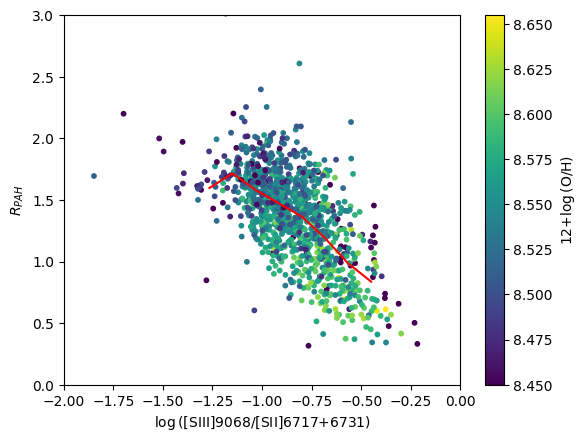

In [139]:
rpahs = np.squeeze(np.array(rpahs))
mets = np.squeeze(np.array(mets))
ips = np.squeeze(np.array(ips))
rec = np.isfinite(ips) & np.isfinite(rpahs) & (rpahs < 3.5) & (mets > 8.2) & (ips > -2.) & (ips < 0)

# sns.histplot(x=(ips[rec]), y=rpahs[rec])

plt.scatter(ips[rec], rpahs[rec], c=mets[rec], s=10,vmin=8.45)
plt.colorbar(label=r'12+$\log$(O/H)')

x,y=calc_mean(ips[rec], rpahs[rec], nbins=15)
plt.plot(x,y,'r-')
plt.ylim(0,3.)
plt.xlim(-2.,0)
plt.xlabel(r'$\log$([SIII]9068/[SII]6717+6731)')
plt.ylabel(r'$R_{PAH}$')



Dependence on the metallicity is not obvious, but $R_{PAH}$ strongly depends on the [SIII]/[SII] - empirical tracer of ionization parameter. Probably, PAHs been destroyed very efficiently in HII regions, independently on the ISM metallicity. More careful analysis of this in <a href="https://ui.adsabs.harvard.edu/abs/2023ApJ...944L..16E">Egorov et al. 2023</a>

## Bonus. Ionization structure of ISM and just beautiful images

Short demonstration of how to make nice color images combined multiwavelength datasets. 
<a href='https://github.com/pjcigan/multicolorfits'>multicolorfits</a> is very useful for this


In [142]:
import multicolorfits as mcf
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u

multicolorfits: kapteyn package required for some options in task reproject2D()



If you will use __multicolorfits__ in this notebook - make sure to explicitely turn on "inline" mode for matplolib after importing it. Otherwise __multicolorfits__ will try to run GUI interface

In [143]:
%matplotlib inline

In [174]:
from reproject import reproject_interp
galaxy = 'ngc628'


with fits.open(os.path.join(jwst_bgrcorr_data_dir, f'{galaxy}_f2100w.fits')) as hdu:
    f2100w_head = hdu['SCI'].header
    wcs_f2100w = WCS(hdu['SCI'].header)
    im_f2100w = hdu['SCI'].data

with fits.open(os.path.join(jwst_bgrcorr_data_dir, f'{galaxy}_f770w.fits')) as hdu:
    wcs_f770w = WCS(hdu['SCI'].header)
    im_f770w = hdu['SCI'].data
    im_f770w = reproject_interp((im_f770w,wcs_f770w), wcs_f2100w, im_f2100w.shape, return_footprint=False)
    
f_ha = glob.glob(os.path.join(muse_data_dir, f'{galaxy}*obs.fits'))[0]
with fits.open(f_ha) as hdu:
    wcs_ha = WCS(hdu[0].header)
    im_ha = hdu[0].data
    im_ha = reproject_interp((im_ha,wcs_ha), wcs_f2100w, im_f2100w.shape, return_footprint=False)

Set DATE-AVG to '2022-07-17T12:34:31.886' from MJD-AVG.
Set DATE-END to '2022-07-17T13:29:16.222' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -37.752318 from OBSGEO-[XYZ].
Set OBSGEO-H to 1738852372.675 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-17T12:01:53.586' from MJD-AVG.
Set DATE-END to '2022-07-17T12:54:46.016' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -37.754891 from OBSGEO-[XYZ].
Set OBSGEO-H to 1738895745.206 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


/opt/anaconda3/envs/jwst/lib/python3.10/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


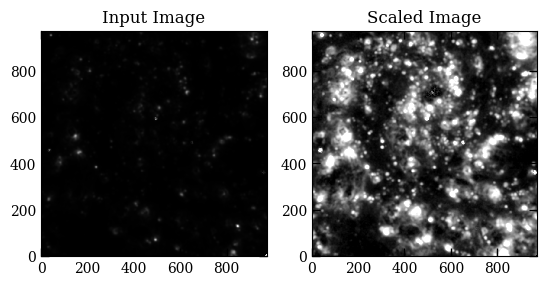

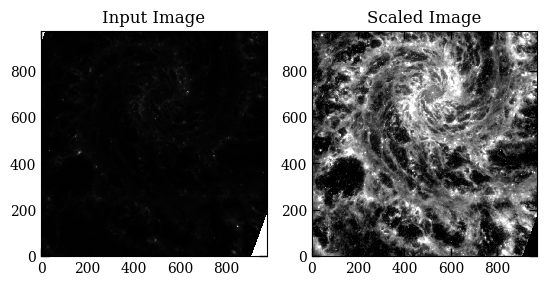

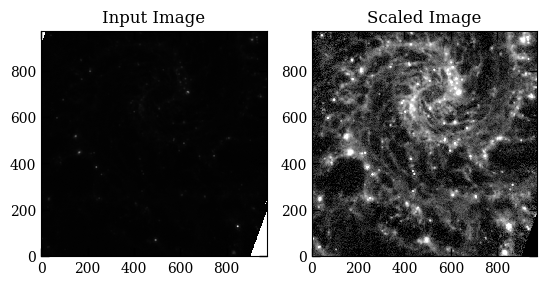

Set OBSGEO-B to   -37.752318 from OBSGEO-[XYZ].
Set OBSGEO-H to 1738852372.675 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


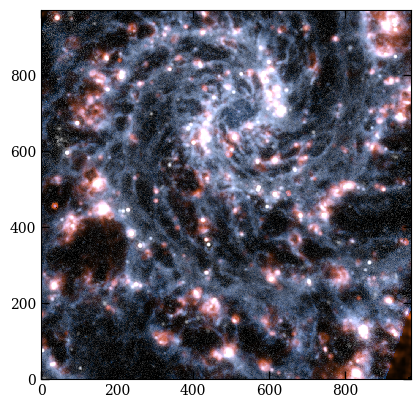

In [178]:
# radec = SkyCoord("12h18m52s +14d25m50s")
radec = SkyCoord("1h36m42s +15d46m37s")
size = 1.8*u.arcmin
im_ha_cout = Cutout2D(im_ha, radec, size=size, wcs=wcs_f2100w)
im_f770w_cout = Cutout2D(im_f770w, radec, size=size, wcs=wcs_f2100w)
im_f2100w_cout = Cutout2D(im_f2100w, radec, size=size, wcs=wcs_f2100w)


ha_greyRGB=mcf.greyRGBize_image(im_ha_cout.data, rescalefn='asinh', scaletype='perc', 
                                min_max=[2.,97.], gamma=3.2, checkscale=True)

f770w_greyRGB=mcf.greyRGBize_image(im_f770w_cout.data, rescalefn='asinh', scaletype='perc', 
                                    min_max=[5.,99.], gamma=2.2, checkscale=True)
f2100w_greyRGB=mcf.greyRGBize_image(im_f2100w_cout.data, rescalefn='asinh', scaletype='perc', 
                                    min_max=[5,99.5], gamma=2.2, checkscale=True)

ha_color=mcf.colorize_image(ha_greyRGB, '#c05210', colorintype='hex', gammacorr_color=2.2)
f2100w_color=mcf.colorize_image(f2100w_greyRGB, '#FF2211', colorintype='hex', gammacorr_color=2.2)
f770w_color=mcf.colorize_image(f770w_greyRGB, '#0072c6', colorintype='hex', gammacorr_color=2.2)

img=mcf.combine_multicolor([ha_color,f770w_color, f2100w_greyRGB],gamma=2.2);

mcf.plotsinglemulticolorRGB(img, im_f2100w_cout.wcs.to_header(), galaxy.upper(), os.path.join(work_dir,f"{galaxy.upper()}_rgb.png"), dpi=300, tickcolor='0.6', labelcolor='k', facecolor='w', minorticks=True)
plt.imshow(img, origin='lower', interpolation='nearest')